In [2]:
import pandas as pd
import numpy as np
import time

In [3]:
df = pd.read_csv("bitcoin_usd.csv")

In [4]:
df.head()

,_id,time,high,low,open,close
0,5f5c943ba9115d187c3c8ad4,1470268800,584.89,559.50,566.44,576.22
1,5f5c943ba9115d187c3c8ad5,1470355200,579.97,565.81,576.22,574.66
2,5f5c943ba9115d187c3c8ad6,1470441600,596.68,565.33,574.66,586.45
3,5f5c943ba9115d187c3c8ad7,1470528000,596.01,580.87,586.45,590.85
4,5f5c943ba9115d187c3c8ad8,1470614400,594.24,585.41,590.85,589.24


In [5]:
df=df.drop(labels=['_id','time'],axis=1)

In [6]:
df.head()

,high,low,open,close
0,584.89,559.50,566.44,576.22
1,579.97,565.81,576.22,574.66
2,596.68,565.33,574.66,586.45
3,596.01,580.87,586.45,590.85
4,594.24,585.41,590.85,589.24


In [7]:
df.tail()

,high,low,open,close
1496,10443.72,9855.68,10379.08,10128.54
1497,10349.09,9989.63,10128.54,10228.85
1498,10493.32,10221.37,10228.85,10345.68
1499,10412.60,10215.49,10345.68,10398.50
1500,10412.41,10323.17,10398.50,10349.80


In [8]:
df.columns

Index(['high', 'low', 'open', 'close'], dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


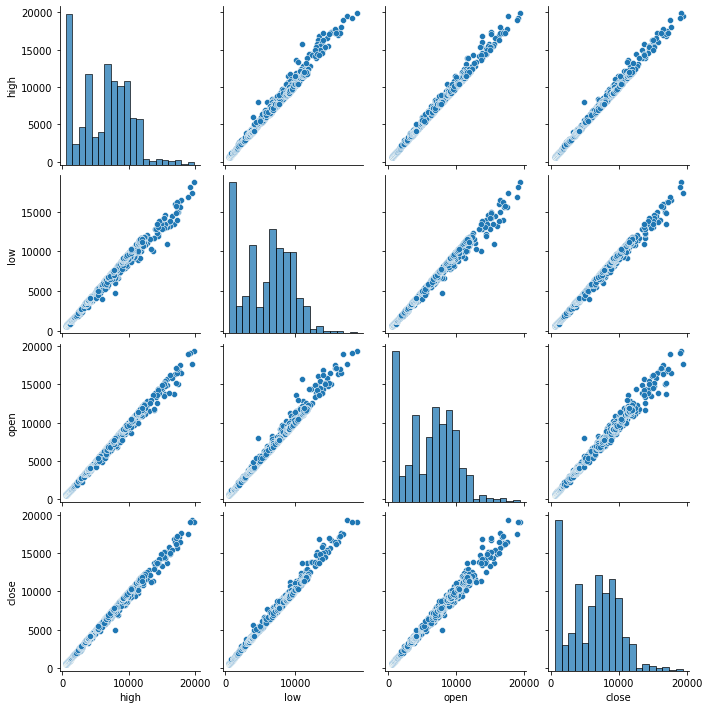

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,high,low,open,close
high,1.000000,0.995285,0.997839,0.998047
low,0.995285,1.000000,0.996269,0.997598
open,0.997839,0.996269,1.000000,0.995761
close,0.998047,0.997598,0.995761,1.000000


<AxesSubplot:>

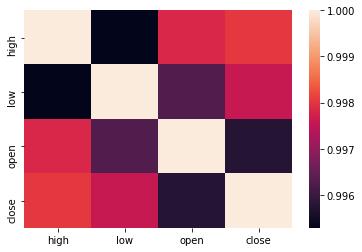

In [12]:
sns.heatmap(df.corr())

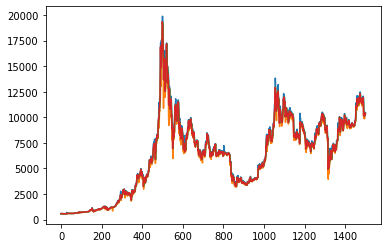

In [13]:
import matplotlib.pyplot as plt
plt.plot(df)

In [14]:
X =df.loc[:,['close', 'low', 'open']]
Y = df.loc[:,'high']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# **Multivariate Linear Regression**

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
sm_time = time.time()
model1 = LinearRegression()
model1.fit(X_train,y_train)
em_time = time.time()
print("Train Accuracy: ", model1.score(X_train,y_train))
print("Test Accuracy: ", model1.score(X_test,y_test))
print("Execution Time: ", em_time - sm_time)

Train Accuracy:  0.9988629751105303
Test Accuracy:  0.9986473052567008
Execution Time:  0.011677265167236328


# **Theil-Sen Regression**

In [19]:
from sklearn.linear_model import TheilSenRegressor

In [20]:
st_time = time.time()
model2 = TheilSenRegressor()
model2.fit(X_train, y_train)
et_time = time.time()
print("Theil-Sen Regression: ")
print("Train Accuracy: ", model2.score(X_train, y_train))
print("Test Accuracy: ", model2.score(X_test, y_test))
print("Execution Time: ", et_time - st_time)

Theil-Sen Regression: 
Train Accuracy:  0.9987089647177715
Test Accuracy:  0.9985065287043321
Execution Time:  1.7621660232543945


# **Huber Regression**

In [21]:
from sklearn.linear_model import HuberRegressor

In [22]:
sh_time = time.time()
model3 = HuberRegressor()
model3.fit(X_train, y_train)
eh_time = time.time()
print("Huber Regression: ")
print("Train Accuracy: ", model3.score(X_train, y_train))
print("Test Accuracy: ", model3.score(X_test, y_test))
print("Execution Time: ", eh_time - sh_time)

Huber Regression: 
Train Accuracy:  0.9987968424041718
Test Accuracy:  0.9986683660265494
Execution Time:  0.07860302925109863


# **Diagram and Table**

In [23]:
df_model = pd.DataFrame({'Model_Applied': ['Linear_Regression', 'TheilSen_Regression', 'Huber_Regression'],
                         'Accuracy': [model1.score(X_test, y_test), model2.score(X_test, y_test),
                                      model3.score(X_test, y_test)],
                         'Execution Time': [em_time - sm_time, et_time - st_time, eh_time - sh_time]})

In [24]:
df_model

,Model_Applied,Accuracy,Execution Time
0,Linear_Regression,0.998647,0.011677
1,TheilSen_Regression,0.998507,1.762166
2,Huber_Regression,0.998668,0.078603


<AxesSubplot:xlabel='Model_Applied'>

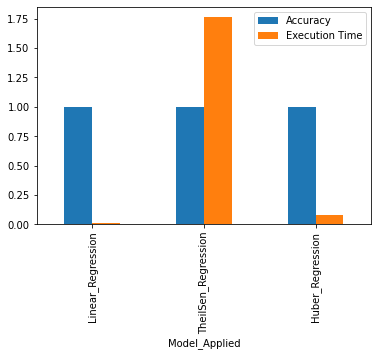

In [25]:
df_model.plot(kind='bar',x='Model_Applied')